# 연령별 취업자 수 관계

- 국가통계포털에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기

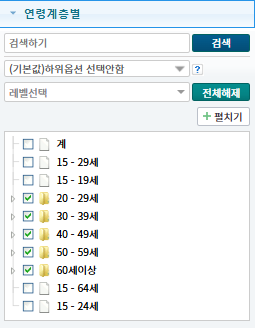
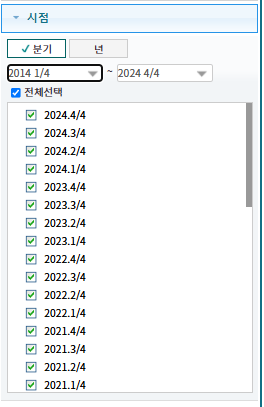

In [1]:
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

Text(0.2, 0.4, '한글')

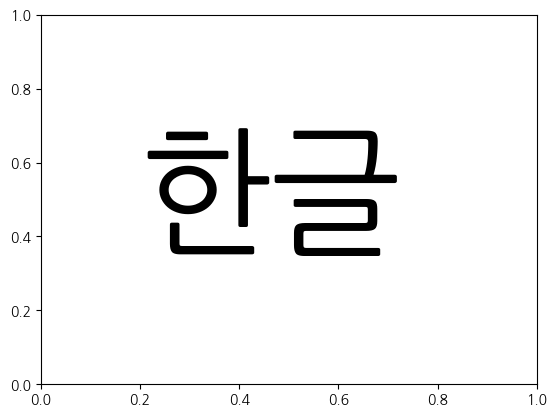

In [2]:
# 윈도우용 폰트 경로 설정
path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.2,0.4,'한글',size=100)

In [3]:
file_path ="./ref/행정구역시도성연령별취업자.csv" 
ori= pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [4]:
ex_data = ori.copy() # 복사
ex_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex_data.loc[ex_data['resion']=='세종특별자치시', 'value'] = ex_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [5]:
ex_data['value'] = ex_data['value'].astype(int)
ex1_data = ex_data.groupby('year')['value'].sum().reset_index(name="total")
ex1_data

,year,total
0,2014.1/4,24955
1,2014.2/4,25866
2,2014.3/4,25969
3,2014.4/4,25847
4,2015.1/4,25295
5,2015.2/4,26114
6,2015.3/4,26214
7,2015.4/4,26148
8,2016.1/4,25502
9,2016.2/4,26320


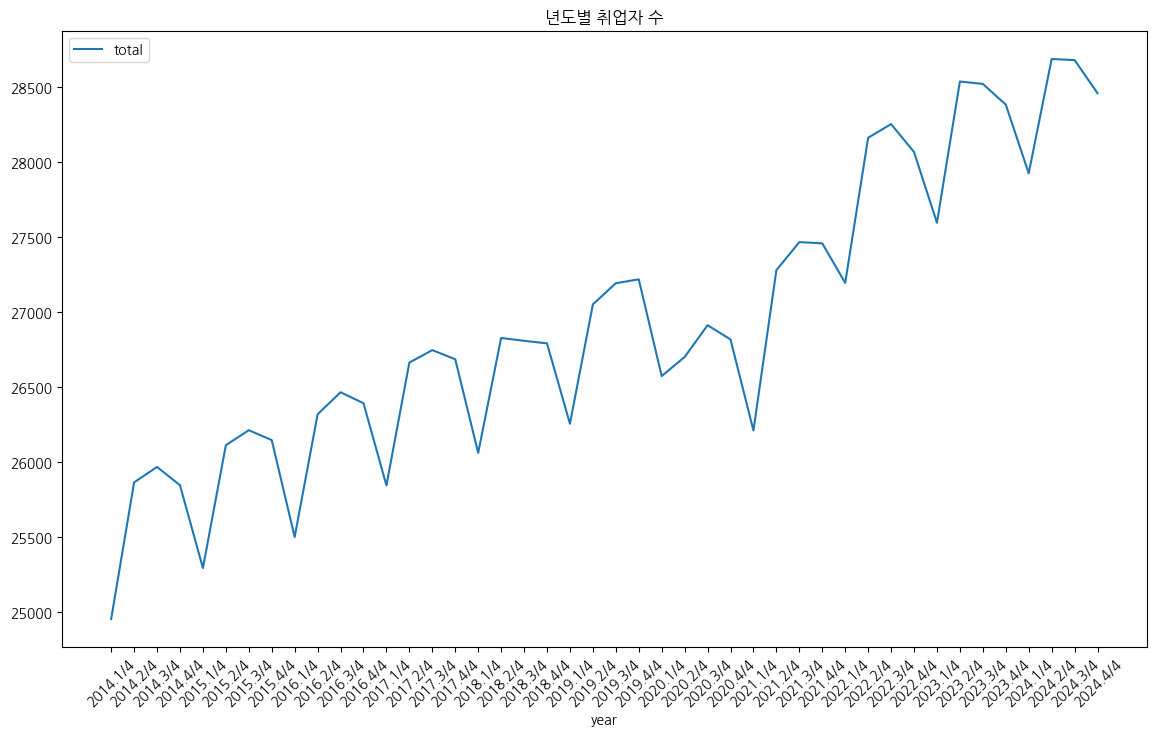

In [6]:
ax = ex1_data.plot(x='year', y='total', figsize=(14,8), title="년도별 취업자 수")
ax.set_xticks(range(len(ex1_data)))
ax.set_xticklabels(ex1_data['year'],rotation=45)
plt.show()

In [7]:
ex2_data = ori.copy() # 복사
ex2_data.columns = ['resion','year','age','gender','value'] # 컬럼이름 일괄 교체
ex2_data.loc[ex2_data['resion']=='세종특별자치시', 'value'] = ex2_data.loc[ex_data['resion']=='세종특별자치시','value'].replace('-',0) # 세종특별자치시
ex2_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [8]:
ex2_data['value'] = ex2_data['value'].astype(int)
gen = ex2_data.groupby(['year','gender'])['value'].sum().reset_index(name='total')
gen

,year,gender,total
0,2014.1/4,남자,14650
1,2014.1/4,여자,10305
2,2014.2/4,남자,15027
3,2014.2/4,여자,10839
4,2014.3/4,남자,15088
...,...,...,...
83,2024.2/4,여자,12716
84,2024.3/4,남자,15945
85,2024.3/4,여자,12737
86,2024.4/4,남자,15868


In [9]:
filter_m = gen['gender']=='남자'
filter_f = gen['gender']=='여자'
male = gen[filter_m]
female = gen[filter_f]

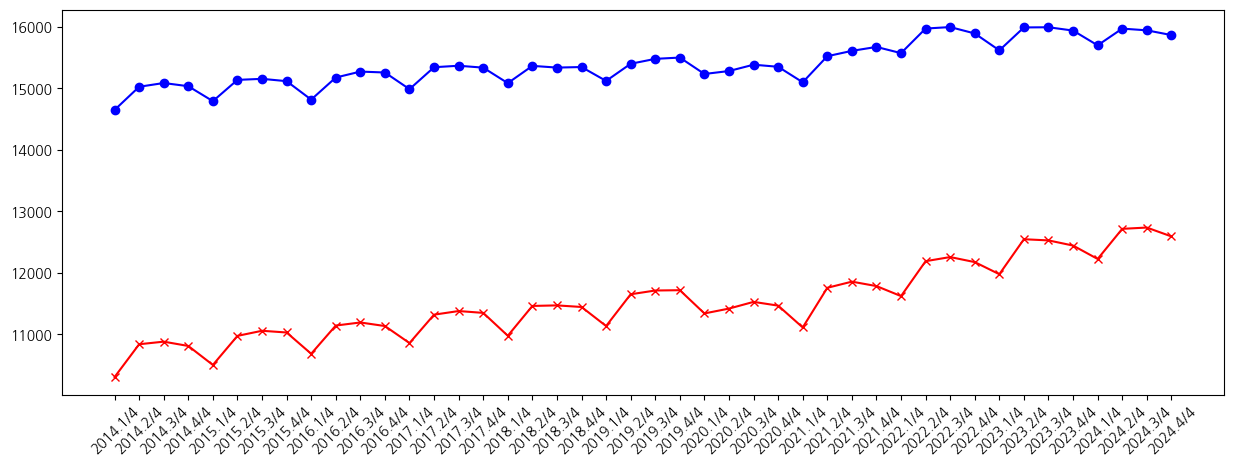

In [10]:
plt.figure(figsize=(15,5))
plt.plot(male['year'], male['total'], label='남자', color="blue", linestyle='-', marker='o')
plt.plot(female['year'], female['total'], label='여자', color="red", linestyle='-', marker='x')
plt.xticks(range(len(ex1_data)))
plt.xticks(ex1_data['year'],rotation=45)
plt.show()

전반적으로 남녀 취업율은 과거에 비해 증가한 것으로 보임
남성의 취업율 증가폭은 일정한 간격으로 오르고 있음. 반면 여성의 취업율 증가폭은 남성에 비해 큰 증가폭을 보이고 있으며 과거 2014년 1/4분기에 비해 2024년 4/4분기는 3배 이상에 증가폭을 보여주고 있어 과거에 비해 여성의 취업율이 크게 증가하였다고 볼 수 있음.
연도별로 1/4분기와 4/4분기가 취업율이 낮으며 2/4분기와 3/4분기가 취업율이 높은것으로 확인됨

In [11]:
ex3_data = ori.copy()
ex3_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].replace('-',0).astype(int)

In [12]:
filter0 = (ex3_data['시점'] >= "2018.1/4") & (ex3_data['시점'] < "2019.1/4")
ex3_data= ex3_data[filter0]
ex3_data.head()

,시도별,시점,연령계층별,성별,데이터
160,서울특별시,2018.1/4,20 - 29세,남자,339
161,서울특별시,2018.1/4,20 - 29세,여자,477
162,서울특별시,2018.1/4,30 - 39세,남자,693
163,서울특별시,2018.1/4,30 - 39세,여자,513
164,서울특별시,2018.1/4,40 - 49세,남자,719


In [13]:
x_data = ex3_data[ex3_data['연령계층별'].isin(['20 - 29세'])]
# x_data.loc[:,'데이터'] = x_data.loc[:,'데이터'].astype(int)
y_data = ex3_data[ex3_data['연령계층별'].isin(['60세이상'])]
# y_data.loc[:,'데이터'] = y_data.loc[:,'데이터'].astype(int)
z_data = ex3_data
# z_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].astype(int)
x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 20대 취업자
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 60대(정년퇴임) 취업
z = z_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') # 전체 취업자 수


In [14]:
import numpy as np
regions = list(x.index)
color = [ np.random.rand(3,) for _ in range(len(regions))]

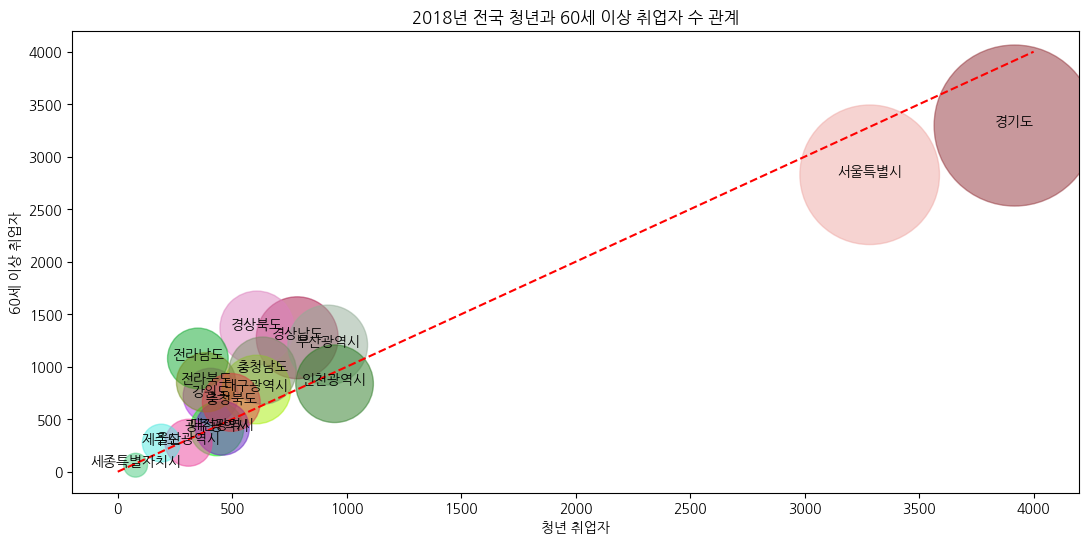

In [15]:
fig , ax  = plt.subplots(figsize=(13,6))
z = np.array(z,dtype=float)
scatter = ax.scatter(x,y,s=z*0.5, c=color, alpha=0.5)

for n in range(len(regions)):
    ax.annotate(regions[n],xy=(x.iloc[n],y.iloc[n]), ha='center')

ax.plot([0,4000],[0,4000], color='r', linestyle='--')    

ax.set_title('2018년 전국 청년과 60세 이상 취업자 수 관계')
ax.set_xlabel('청년 취업자')
ax.set_ylabel('60세 이상 취업자')
plt.show()

In [16]:
ex4_data = ori.copy()
ex4_data.loc[:,'데이터'] = ex4_data.loc[:,'데이터'].replace('-',0).astype(int)

In [17]:
filter0 = (ex4_data['시점'] >= "2024.1/4") & (ex4_data['시점'] < "2025.1/4")
ex4_data= ex4_data[filter0]
ex4_data.head()

,시도별,시점,연령계층별,성별,데이터
400,서울특별시,2024.1/4,20 - 29세,남자,366
401,서울특별시,2024.1/4,20 - 29세,여자,518
402,서울특별시,2024.1/4,30 - 39세,남자,635
403,서울특별시,2024.1/4,30 - 39세,여자,571
404,서울특별시,2024.1/4,40 - 49세,남자,617


In [18]:
x_data = ex4_data[ex4_data['연령계층별'].isin(['20 - 29세'])]
# x_data.loc[:,'데이터'] = x_data.loc[:,'데이터'].astype(int)
y_data = ex4_data[ex4_data['연령계층별'].isin(['60세이상'])]
# y_data.loc[:,'데이터'] = y_data.loc[:,'데이터'].astype(int)
z_data = ex4_data
# z_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].astype(int)
x = x_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 20대 취업자
y = y_data.groupby('시도별')['데이터'].sum()#.reset_index(name="total") # 60대(정년퇴임) 취업
z = z_data.groupby('시도별')['데이터'].sum()#.reset_index(name='total') # 전체 취업자 수


In [19]:
import numpy as np
regions = list(x.index)
color = [ np.random.rand(3,) for _ in range(len(regions))]

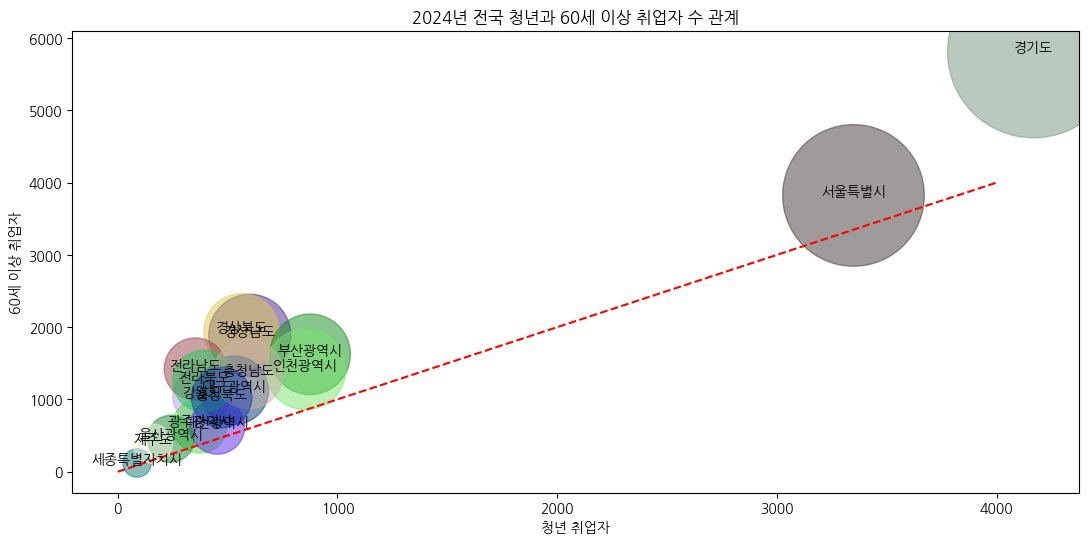

In [20]:
fig , ax  = plt.subplots(figsize=(13,6))
z = np.array(z,dtype=float)
scatter = ax.scatter(x,y,s=z*0.5, c=color, alpha=0.5)

for n in range(len(regions)):
    ax.annotate(regions[n],xy=(x.iloc[n],y.iloc[n]), ha='center')

ax.plot([0,4000],[0,4000], color='r', linestyle='--')    

ax.set_title('2024년 전국 청년과 60세 이상 취업자 수 관계')
ax.set_xlabel('청년 취업자')
ax.set_ylabel('60세 이상 취업자')
plt.show()

In [21]:
from prophet import Prophet 

In [22]:
ex5_data = ex1_data.copy()
ex5_data.head()

,year,total
0,2014.1/4,24955
1,2014.2/4,25866
2,2014.3/4,25969
3,2014.4/4,25847
4,2015.1/4,25295


In [31]:
# '/'를 '-'로 대체
ex5_data["year"] = ex5_data["year"].str.replace("/", "-", regex=False)
ex5_data["year"] = ex5_data["year"].str.replace(".", "-", regex=False)
print(ex5_data)


        year  total
0   2014-1-4  24955
1   2014-2-4  25866
2   2014-3-4  25969
3   2014-4-4  25847
4   2015-1-4  25295
5   2015-2-4  26114
6   2015-3-4  26214
7   2015-4-4  26148
8   2016-1-4  25502
9   2016-2-4  26320
10  2016-3-4  26467
11  2016-4-4  26394
12  2017-1-4  25846
13  2017-2-4  26665
14  2017-3-4  26748
15  2017-4-4  26687
16  2018-1-4  26063
17  2018-2-4  26829
18  2018-3-4  26810
19  2018-4-4  26793
20  2019-1-4  26257
21  2019-2-4  27053
22  2019-3-4  27194
23  2019-4-4  27220
24  2020-1-4  26575
25  2020-2-4  26702
26  2020-3-4  26914
27  2020-4-4  26819
28  2021-1-4  26212
29  2021-2-4  27281
30  2021-3-4  27468
31  2021-4-4  27460
32  2022-1-4  27196
33  2022-2-4  28164
34  2022-3-4  28255
35  2022-4-4  28069
36  2023-1-4  27597
37  2023-2-4  28539
38  2023-3-4  28523
39  2023-4-4  28385
40  2024-1-4  27927
41  2024-2-4  28689
42  2024-3-4  28682
43  2024-4-4  28461


In [32]:
ex6_data = ex5_data.copy()
ex6_data = ex5_data.rename(columns={'year':'ds','total':'y'})
ex6_data.head()

,ds,y
0,2014-1-4,24955
1,2014-2-4,25866
2,2014-3-4,25969
3,2014-4-4,25847
4,2015-1-4,25295


In [33]:
m=Prophet()
m.fit(ex6_data)

12:05:15 - cmdstanpy - INFO - Chain [1] start processing
12:05:16 - cmdstanpy - INFO - Chain [1] done processing


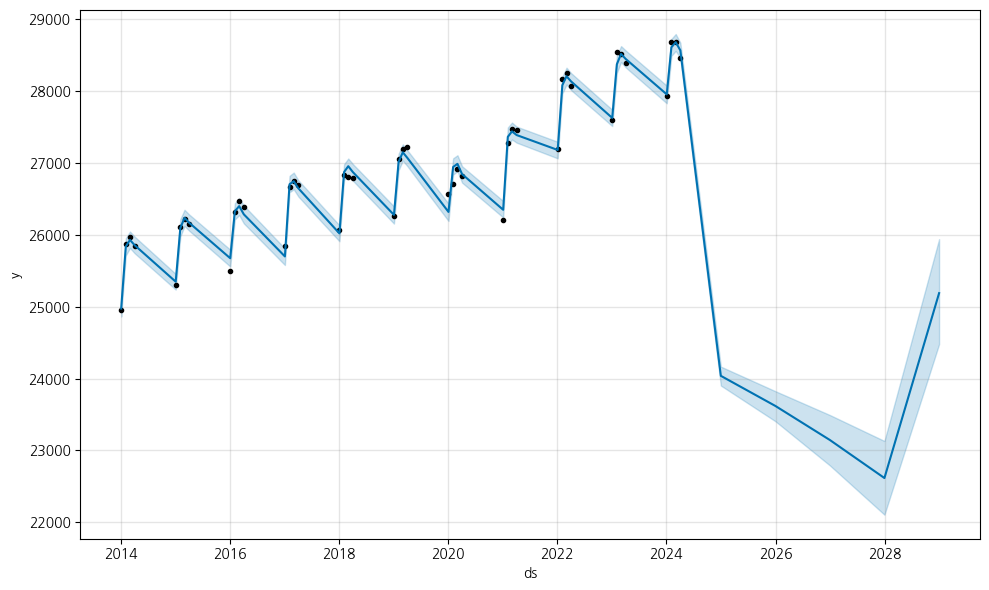

<Figure size 1000x1500 with 0 Axes>

In [38]:
future = m.make_future_dataframe(periods=5,freq='YE')
forecast=m.predict(future)
fig1=m.plot(forecast)
plt.savefig("./chart/예측취업.png")
plt.figure(figsize=(10,15))
plt.show()